<a href="https://colab.research.google.com/github/Ayosalau/Simple-Linear-Regression-Using-Python/blob/main/Exercise_2_03_Examining_a_Possible_Log_Linear_Relationship_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

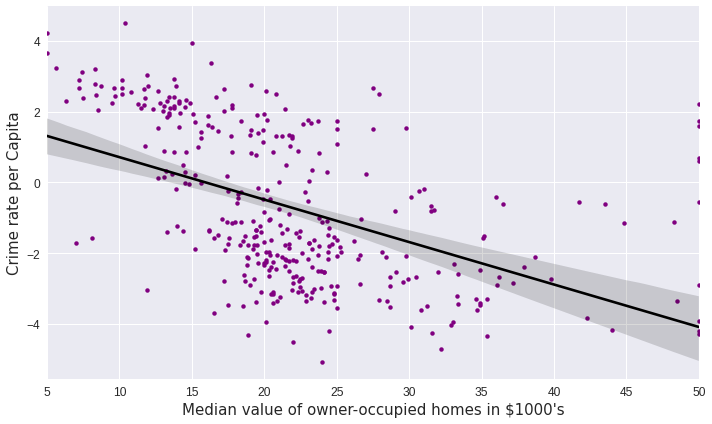

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
rawBostonData = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')
rawBostonData = rawBostonData.dropna()
rawBostonData = rawBostonData.drop_duplicates()
list(rawBostonData.columns)
renamedBostonData = rawBostonData.rename(columns= {'CRIM':'crimeRatePerCapita',
 ' ZN ':'landOver25K_sqft',
 'INDUS ':'non-retailLandProptn',
 'CHAS':'riverDummy',
 'NOX':'nitrixOxide_pp10m',
 'RM':'AvgNo.RoomsPerDwelling',
 'AGE':'ProptnOwnerOccupied',
 'DIS':'weightedDist',
 'RAD':'radialHighwaysAccess',
 'TAX':'propTaxRate_per10K',
 'PTRATIO':'pupilTeacherRatio',
 'LSTAT':'pctLowerStatus',
 'MEDV':'medianValue_Ks'})
X = renamedBostonData.drop('crimeRatePerCapita', axis = 1)
y = renamedBostonData[['crimeRatePerCapita']]
seed = 10
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_data_size, random_state = seed)
train_data = pd.concat([X_train,y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)
import seaborn as sns
plt.style.use('seaborn')
from statsmodels.graphics.correlation import plot_corr
fig, ax = plt.subplots(figsize=(10, 6))
y = np.log(train_data['crimeRatePerCapita'])
sns.regplot(x='medianValue_Ks', y=y, ci=95, data=train_data, ax=ax, color='k', scatter_kws={"s": 20,"color": "purple", "alpha":1})
ax.set_ylabel('Crime rate per Capita', fontsize=15,fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes " "in $1000's", fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()